<a href="https://colab.research.google.com/github/sammix95/Sammix/blob/no-show/Michael_Samuel_Udacity_Project(edited).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SAMUEL, MICHAEL JOHN (PROJECT 1): 

NO SHOW APPOINTMENT DATA ANALYSIS

## Table of Content

<ul>
<li><a href = "#intro">Introduction</a></li>
<li><a href = "#datawrangling">Data Wrangling</a></li>
<li><a href = "#eda">Exploratory Data Analysis (EDA) </a></li>
<li><a href = "#conclude">Conclusion</a></li>
<li><a href = '#limit'>Limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Description of the dataset:

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

## Question for Analysis
<ul>
<li>What percentage of patients show up for appointment and those that won't show up?</li>
</ul>

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

<a id='datawrangling'></a>

## Data Wrangling
 I will have to access the data by loading it using pandas.

In [100]:
dataset = pd.read_csv('No_Show_Appointment.csv')
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


 Let me get details about the dataset and also check for missing data

In [101]:
dataset.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing data was found in the dataset. Now let me check for number of duplicated rows.:

In [103]:
sum(dataset.duplicated())

0

it returned 0 which means there is no duplicated rows.

From the description of the dataset using dataset.describe(), the age column has a minimum value of -1. Age is not meant to have a negative value so lets clean up the dataset.

## Data Cleaning

Let me clean the Age column to remove the negative value. Before then, let me know the number of rows that as negative values.

In [104]:
dataset[dataset["Age"]== -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Only one row has negative value. Now I will remove it from the dataset and check to confirm it has been removed.

In [105]:
dataset.drop(index=dataset[dataset["Age"]== -1].index, inplace = True)
dataset.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The Hypertension column is wrongly spelt. Let me correct it. 

In [106]:
dataset.rename({'Hipertension':'Hypertension'}, axis=1, inplace = True)
dataset.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>

## Exploratory Data Analysis
 Next, I have to calculate what percentage will show up for their appointment and those that will not show up.

The number of patients that showed up for their scheduled appointment are 88207 
 while the number of patients that did not show up for their scheduled appointment are 22319, 
 as illustrated in the bar chart below.


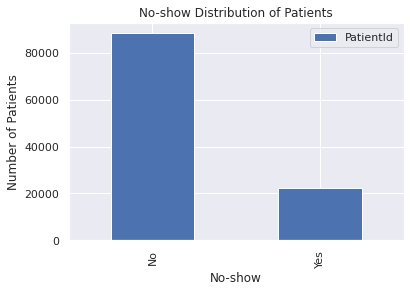

In [107]:
dataset.groupby(['No-show'])[['PatientId']].count().plot(kind='bar',title='No-show Distribution of Patients').set_ylabel('Number of Patients')
no_show_count = dataset["No-show"].value_counts()
print("The number of patients that showed up for their scheduled appointment are {} \n while the number of patients that did not show up for their scheduled appointment are {}, \n as illustrated in the bar chart below.".format(no_show_count['No'], no_show_count['Yes']))

In [108]:
# calculate the percentage that will show up and the percentage that will not show up for their scheduled appointment.
percent_showed_up = (no_show_count/sum(no_show_count))*100
print("{}% of the patients will show up for their scheduled appointment.".format(round(percent_showed_up["No"],2)))
print("While {}% of the patients will not show up for their scheduled appointment.".format(round(percent_showed_up["Yes"],2)))


79.81% of the patients will show up for their scheduled appointment.
While 20.19% of the patients will not show up for their scheduled appointment.


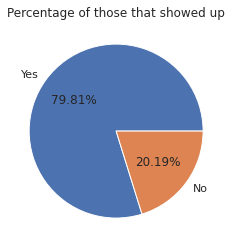

<Figure size 432x288 with 0 Axes>

In [109]:
# Let's visualize it using pie chart
plt.pie(percent_showed_up,labels=["Yes", "No"], autopct = '%.2f%%')
plt.title('Percentage of those that showed up')
plt.show()
plt.tight_layout()

### The Various Distribution of Patients



In [110]:
# create a function that will plot a bar chart to check the distribution of various diseases among patients
def plot_bar(x):
  dataset.groupby([x])[['PatientId']].count().plot(kind='bar', title='{} Distribution of Patients'.format(x)).set_ylabel('Number of Patients')
  plt.show()
  return

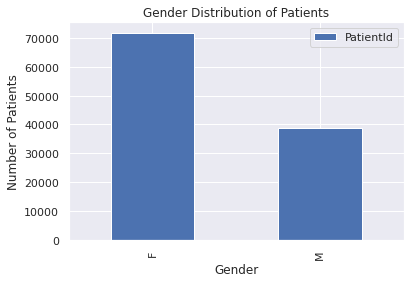

In [111]:
plot_bar('Gender')

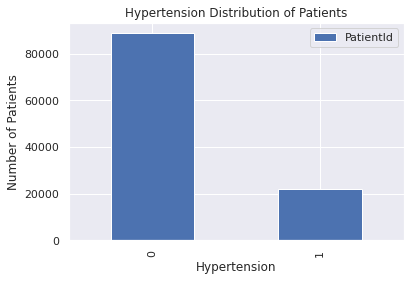

In [112]:
plot_bar('Hypertension')

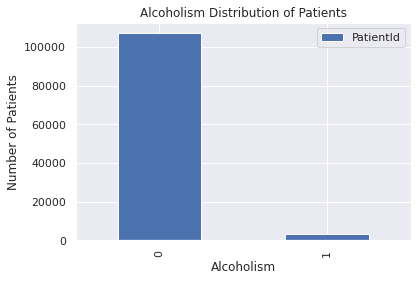

In [113]:
plot_bar('Alcoholism')

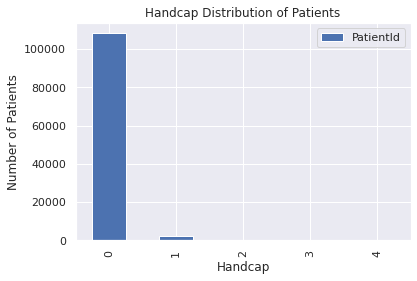

In [114]:
plot_bar('Handcap')

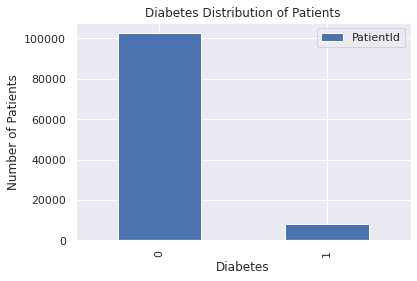

In [115]:
plot_bar('Diabetes')

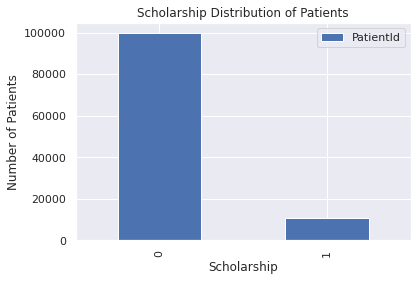

In [116]:
plot_bar('Scholarship')

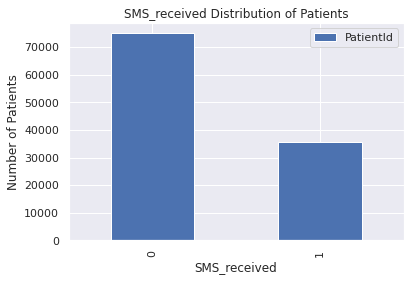

In [117]:
plot_bar('SMS_received')

#### Using Histogram to Show the Age Distribution of Patients

Text(0.5, 1.0, 'Age Distribution of Patients')

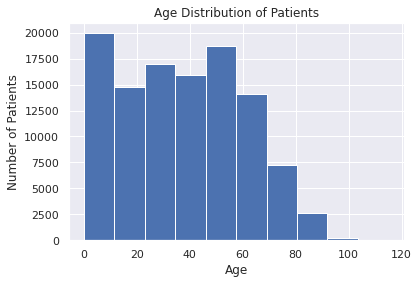

In [118]:
ax = dataset['Age'].hist()
ax.set_ylabel('Number of Patients')
ax.set_xlabel('Age')
ax.set_title("Age Distribution of Patients")


Boxplot grouped by No-show

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Age of Patients')

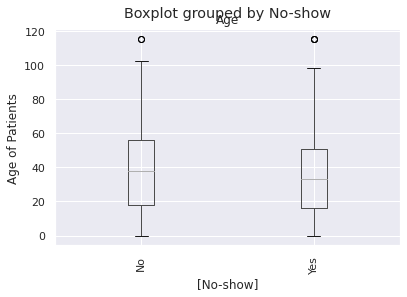

In [119]:
# let's create a boxplot of Age and No-show
dataset.boxplot(column=['Age'], by = ['No-show'], rot = 90).set_ylabel('Age of Patients')

Boxplot grouped by Hypertension. 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Age of Patients')

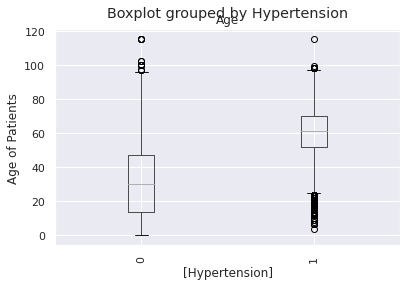

In [120]:
# Let's create a boxplot for Age and Hypertension
dataset.boxplot(column=['Age'], by = ['Hypertension'], rot = 90).set_ylabel('Age of Patients') 

### Patients that showed up and those that didn't show up but they don't have hypertension

No     70178
Yes    18547
Name: No-show, dtype: int64

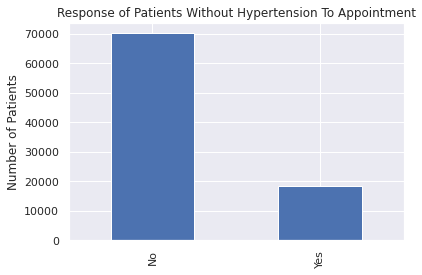

In [121]:
#calculate the number of patients without hypertension
hypertension_absent = dataset.query(' {} == 0'.format("Hypertension"))["No-show"].value_counts()
hypertension_absent.plot(kind='bar', title='Response of Patients Without Hypertension To Appointment').set_ylabel('Number of Patients')
hypertension_absent

In [122]:
#calculate the percentage of patients that don't have hypertension and how they respond the their scheduled appointment.
hypertension_absent_showup = hypertension_absent/sum(hypertension_absent)
print("{}% of patients showed up but they don't have the hypertension.".format(round(hypertension_absent_showup["No"]*100,2)))
print("{}% of patients didn't showed up and they don't have the hypertension.".format(round(hypertension_absent_showup["Yes"]*100,2)))

79.1% of patients showed up but they don't have the hypertension.
20.9% of patients didn't showed up and they don't have the hypertension.


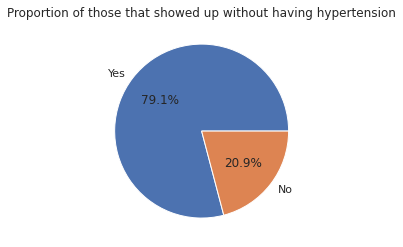

<Figure size 432x288 with 0 Axes>

In [40]:
# Let's visualize it using pie chart
plt.pie(hypertension_absent_showup,labels=["Yes", "No"], autopct = '%1.1f%%')
plt.title('Proportion of those that showed up without having hypertension')
plt.show()
plt.tight_layout()

### Patients that showed up and those that didn't show up but they have hypertension

No     18029
Yes     3772
Name: No-show, dtype: int64

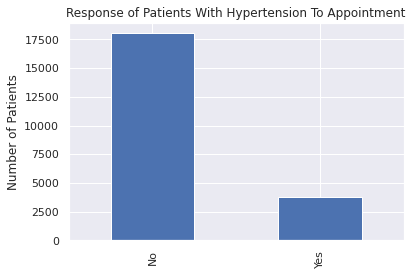

In [43]:
#calculate the number of patients with hypertension
hypertension_present = dataset.query(' {} != 0'.format("Hypertension"))["No-show"].value_counts()
hypertension_present.plot(kind='bar', title='Response of Patients With Hypertension To Appointment').set_ylabel('Number of Patients')
hypertension_present

In [42]:
#calculate the percentage of patients that have hypertension and how they respond to their scheduled appointment
hypertension_present_showup = hypertension_present/sum(hypertension_present)
print("{}% of patients showed up and they have hypertension".format(round(hypertension_present_showup["No"]*100,2)))
print("{}% of patients didn't showed up and they have hypertension".format(round(hypertension_present_showup["Yes"]*100,2)))

82.7% of patients showed up and they have hypertension
17.3% of patients didn't showed up and they have hypertension


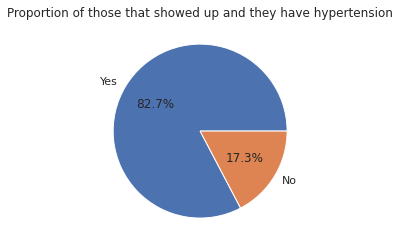

<Figure size 432x288 with 0 Axes>

In [44]:
# Let's visualize it using pie chart
plt.pie(hypertension_present_showup,labels=["Yes", "No"], autopct = '%1.1f%%')
plt.title('Proportion of those that showed up and they have hypertension')
plt.show()
plt.tight_layout()

<a id='conclude'></a>

## Conclusion


<ul>
<li>From the analysis, 79.9% of the patients showed up for their scheduled appointment, while 20.1% did not show up.</li>
<li> Also, 79.25% did not have hypertension but showed up for appointment, 20.75% did not show up and they don't have hypertension.</li>
<li>82.8% of the patients have hypertension and they showed up for their appointment while 17.20% have hypertension but didn't show up for their appointment.</li>
</ul>



<a id='limit'></a>

## Limitations

<ul>
<li>There were no enough features to carry out more analysis on the dataset.</li>
<li>My analysis is only limited to hypertension case study.</li>
</ul>

### N/B: No references were used in carrying out this project.